<div class="alert alert-info">
<b>Описание проекта:</b>
    
Несмотря на огромные вложения в рекламу одного приложения.Последние несколько месяцев компания терпит убытки. Наша- задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

<b>Цель исследования:</b>
Выявить причины убытков компании и дать рекомендации маркетинговому отделу, которые позволят выйти в плюс.

<b>Ход исследования:</b>
Необходимо проверить данных на ошибки прежде чем анализировать идавать оценку. Поэтому исследование будет разделено на следующие этапы:
    
    1. Обзор данных
    2. Предобработка данных
    3. Написание фунций для расчета и анализа
    4. Исследовательский анализ данных
    5. Расчет маркетинговых показателей и оценка
    6. Оценка окупаемости рекламы
    7. Выводы
    

### Загрузка данных и подготовка их к анализу

Загрузка данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Источники**

- визиты: `/datasets/visits_info_short.csv`
- заказы: `/datasets/orders_info_short.csv`
- расходы: `/datasets/costs_info_short.csv`



<b>Шаг 1. Загрузка данных и подготовка их к анализу<b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, datetime, timedelta

In [2]:
visits=pd.read_csv('/datasets/visits_info_short.csv')
orders=pd.read_csv('/datasets/orders_info_short.csv')
costs=pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


изменить тип данных у даты начала и даты конца сессии

In [5]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


<b>Заменим названия столбцов (приведите к нижнему регистру) и добавим нижнее подчеркивание<b>;

In [9]:
visits.columns =visits.columns.str.lower()
orders.columns =orders.columns.str.lower()
costs.columns =costs.columns.str.lower()#приведем название столбцов в единый вид- к нижнему регистру

In [10]:
visits.columns = visits.columns.str.replace(" ", "_")
orders.columns =orders.columns.str.replace(" ", "_")
costs.columns =costs.columns.str.replace(" ", "_")

<b>Проверим данные на пропуски и дубликаты <b>;

In [11]:
print(visits.isnull().sum())
print(orders.isnull().sum())
print(costs.isnull().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
user_id     0
event_dt    0
revenue     0
dtype: int64
dt         0
channel    0
costs      0
dtype: int64


<b>Пропуски отсутствуют <b>

In [12]:
duplicate_visits=visits.duplicated().sum()
print(duplicate_visits) #Выведим на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

0


In [13]:
duplicate_orders=orders.duplicated().sum()
print(duplicate_orders)

0


In [14]:
duplicate_costs=costs.duplicated().sum()
print(duplicate_costs)

0


<b>Явные дубликаты отсутствуют<b>

In [15]:
 # просматриваем уникальные значения наименований страны из таблицы visits
display(visits['region'].unique())
display(visits['region'].nunique())

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

4

In [16]:
 # просматриваем уникальные значения наименований device из таблицы visits
display(visits['device'].unique())
display(visits['device'].nunique())

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

4

In [17]:
 # просматриваем уникальные значения наименований channel из таблицы visits
display(visits['channel'].unique())
display(visits['channel'].nunique())

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

11

<b>Не наблюдаются дубликаты среди наименований в таблице visits<b>

<b>Изменим тип данных в таблицах в столбцах с датой<b>

In [18]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

<b>Изменим тип данных в таблице visits<b>

In [19]:

visits['region'] = visits['region'].astype(str)
visits['device'] = visits['device'].astype(str)
visits['channel'] = visits['channel'].astype(str)

In [20]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [21]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


<b>Проверим данные на выбросы<b>

In [22]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [23]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

<b>В заказах выбросов не наблюдаем, медиана и среднее приближены по значениям. Затраты на маркетинг - сложно дать оценку по одной лишь описательной статистике, возможно на какие то каналы идет больше рекламы.<b>

<div class="alert alert-info">
<b> Вывод по обзору данных</b>

1. Некорректное наименований колонок. Привели наименование колонок к нижнему регистру и добавили нижнее подчеркивание.
2. Исправлены типы данных столбцов с датами.
3. Пропуски. Не найдены
4. Дубликаты. Не найдены
5. Выбросы. Не найдены


<b> Шаг 2. Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.</b>

In [24]:
import time
from datetime import datetime
from datetime import date, timedelta as td

observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

In [25]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [26]:
# функция для расчёта удержания



def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [28]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [29]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


In [30]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<b> функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().<b>

In [31]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [32]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составим профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясним из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

<b>Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.<b>

In [33]:
# профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [34]:
# интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()  # момент анализа
print(min_analysis_date)
print(observation_date)

2019-05-01 00:00:00
2019-10-27 00:00:00


Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27

<b>Выясним из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.<b>

In [35]:

region_part = pd.DataFrame()
region_part['users_count'] = profiles.groupby('region')['user_id'].count()
region_part['part'] = ((region_part['users_count'] / profiles['region'].count()) * 100)
region_part.sort_values(by='part', ascending=False).style.format({'part': '{:.2f}%'})

,users_count,part
region,,
United States,100002,66.66%
UK,17575,11.72%
France,17450,11.63%
Germany,14981,9.99%


Большая часть пользователей из США, меньше всего (10%)- Германия

In [36]:
region_payer_part = pd.DataFrame()
region_payer_part['users_count'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer_part['part'] = ((region_payer_part['users_count'] / profiles.query('payer == True')['region'].count()) * 100)
region_payer_part.sort_values(by='part', ascending=False).style.format({'part': '{:.2f}%'})

,users_count,part
region,,
United States,6902,77.72%
UK,700,7.88%
France,663,7.47%
Germany,616,6.94%


Больше всего платящих пользователей из США 78%. Меньше всего из Германии 7%.  Франция и Англия почти поравну 8%

<b>Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.<b>

In [37]:

def pivot_part(column, df):
    result = pd.DataFrame()
    result['users_count'] = df.groupby(column)['user_id'].count()
    result['users_part'] = ((result['users_count'] / df[column].count()) * 100)
    result['payer_users_count'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_part'] = ((result['payer_users_count'] / result['users_count']) * 100)
    return result.sort_values(by='users_part', ascending=False).style.format({'users_part': '{:.2f}%', 'payer_part': '{:.2f}%'})
pivot_part('region', profiles)

,users_count,users_part,payer_users_count,payer_part
region,,,,
United States,100002,66.66%,6902,6.90%
UK,17575,11.72%,700,3.98%
France,17450,11.63%,663,3.80%
Germany,14981,9.99%,616,4.11%


Доля платящих пользователей США  - 6,9%
Англии - 3,9%
Франции - 3,8%
Германии - 4,11%

<b>Узнаем какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.<b>

In [38]:
device_part = pd.DataFrame()
device_part['users_count'] = profiles.groupby('device')['user_id'].count()
device_part['part'] = ((device_part['users_count'] / profiles['device'].count()) * 100)
device_part.sort_values(by='part', ascending=False).style.format({'part': '{:.2f}%'})

,users_count,part
device,,
iPhone,54479,36.32%
Android,35032,23.35%
PC,30455,20.30%
Mac,30042,20.03%


Большая часть пользователей Iphone 36%, далее Andriod 23%, PC и Mac почти равны в долях - 20%

In [39]:
device_payer_part = pd.DataFrame()
device_payer_part['users_count'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer_part['part'] = ((device_payer_part['users_count'] / profiles.query('payer == True')['device'].count()) * 100)
device_payer_part.sort_values(by='part', ascending=False).style.format({'part': '{:.2f}%'})

,users_count,part
device,,
iPhone,3382,38.08%
Android,2050,23.08%
Mac,1912,21.53%
PC,1537,17.31%


Среди платящих пользователей ситуация аналогичная. Iphone 38%, далее Android  

In [40]:
pivot_part('device', profiles)

,users_count,users_part,payer_users_count,payer_part
device,,,,
iPhone,54479,36.32%,3382,6.21%
Android,35032,23.35%,2050,5.85%
PC,30455,20.30%,1537,5.05%
Mac,30042,20.03%,1912,6.36%


Рассмотрим долю платящих пользователей отдельно по устройством. Наблюдаем что доля платящих пользователей среди Iphonr и  Mac почти равна - 6%. Далее следует  Android и PC

<b>Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.<b>

In [41]:
pivot_part('channel', profiles)

,users_count,users_part,payer_users_count,payer_part
channel,,,,
organic,56439,37.62%,1160,2.06%
FaceBoom,29144,19.43%,3557,12.20%
TipTop,19561,13.04%,1878,9.60%
OppleCreativeMedia,8605,5.74%,233,2.71%
LeapBob,8553,5.70%,262,3.06%
WahooNetBanner,8553,5.70%,453,5.30%
RocketSuperAds,4448,2.97%,352,7.91%
MediaTornado,4364,2.91%,156,3.57%
YRabbit,4312,2.87%,165,3.83%


Наблюдаем самый большой канал среди всех пользоватей - Organic -37%. Далее по рейтенгу идут FaceBoom и TipTop. У платящих пользователей разбивка иная. Превое место по каналу у FaceBoom (40%) , далее Tiptop(21%) и Organic(13%). Менее популярный канал для двух категорий lambdaMediaAds

<div class="alert alert-info">

Общий вывод по разделу:
    
    1.На этапе анализа данных были определены минимальная и максимальная даты привлечения пользователей 2019-05-01 00:00:00 и 2019-10-27 00:00:00.
    2.Построены профили пользователей.
    3.Определены данные по кличеству пользователей в каждой стране и их доли. Судя по данным, больше всего пользователей из США 66%. Далее идут Англия и Франция, меньше всего в Германии 10%.
    4.Определены данные по количеству и долям платящие пользователи в общем. Больше всего платящих пользователей остается в США 78%, меньше всего в Германии 7%.
    5.Определены платящие пользователи в каждой стране. Судя по данным, платящих пользователей в США всего 6,9% это 6902 человек.В Англии платящие пользователи 3.98% (700 человек). Меньше всего в Германии 4%.
    6.Определены самые популярные девайсы среди пользователей - Ihpone 36% и Andriod 23%. Менее популярны Mac и PC по 20%.
    7.Определены самые популярные девайсы среди платящих пользователей Ihpone и Mac  по 6%
    8.Выявлены каналы по которым приходят больше всего пользователей. Это канал Organic  37%, далее FaceBoom и TipTop.
    9.Выявлены каналы по которым приходят платящие пользователи. Это канал каналы FaceBoom 12.20%, AdNonSense11.34% и lambdaMediaAds10.47%.
    10.Выявлены каналы по которым меньше всего платящих пользователей. Это канал  Organic 2%.
    
    

### Маркетинг

- Посчитаим общую сумму расходов на маркетинг.
- Выясним как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
- Узнаем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.


<b>Посчитаем общую сумму расходов на маркетинг.<b>

In [42]:
display(costs['costs'].sum())

105497.30000000002

Общая сумма расходов на маркетинг равна 105497

<b>Выясним как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.<b>

In [43]:
channel_costs= pd.DataFrame()
channel_costs['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs['part'] = ((channel_costs['costs'] / costs['costs'].sum()) * 100)
channel_costs.sort_values(by='part', ascending=False).style.format({'part': '{:.2f}%', 'payer_part': '{:.2f}%'})

,costs,part
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Самый затратный канал TipTop -52%, далее следует FaceBoom 31%. Самый низко затратный канал YRabbit - менее 1%.

<b>Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постараемся отразить это на одном графике.<b>

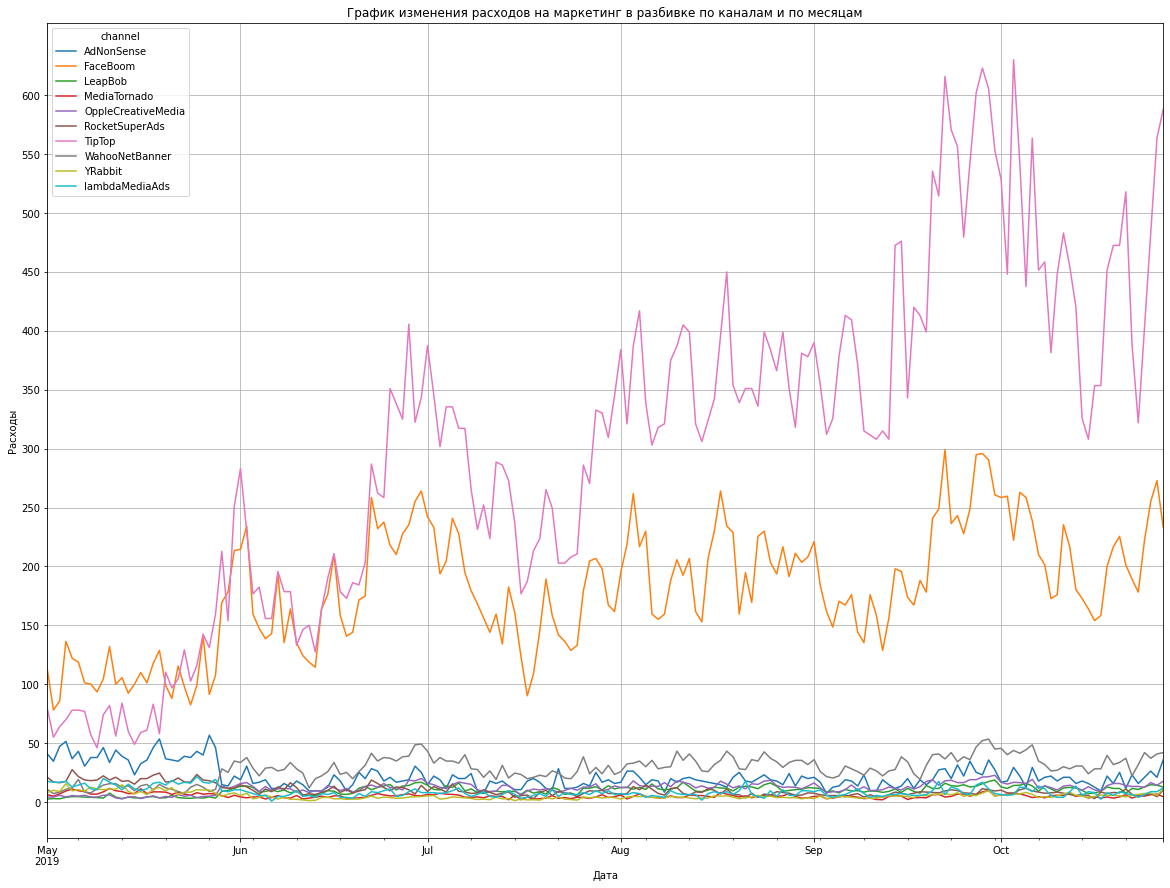

In [44]:
# График изменения расходов во времени по каналам по месяцам
costs_history = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
ax = costs_history.plot(  
           grid=True, figsize=(20, 15),      
           label='Каналы',                     
           legend=True,
           
) 

plt.yticks(np.arange(0, 650, 50)) 
plt.title('График изменения расходов на маркетинг в разбивке по каналам и по месяцам')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()


Самые высокозатратные  - TipTop и FaceBoom.
TipTop лидирует в данном рейтинге - расходы доходили до 650 в октябре. При этом можно сказать, что расходы растут каждый месяц.У  Faceboom  затраты доходили до 300 в сентябре.

Остальные каналы не выделяются столь высокими расходами и волатильностью.



In [45]:
# Создадим колонку week для анализа изменения расходов во времени по неделям
costs['dt']=costs['dt'].astype('datetime64[M]')
costs['week']=costs['dt'].astype('datetime64[W]')

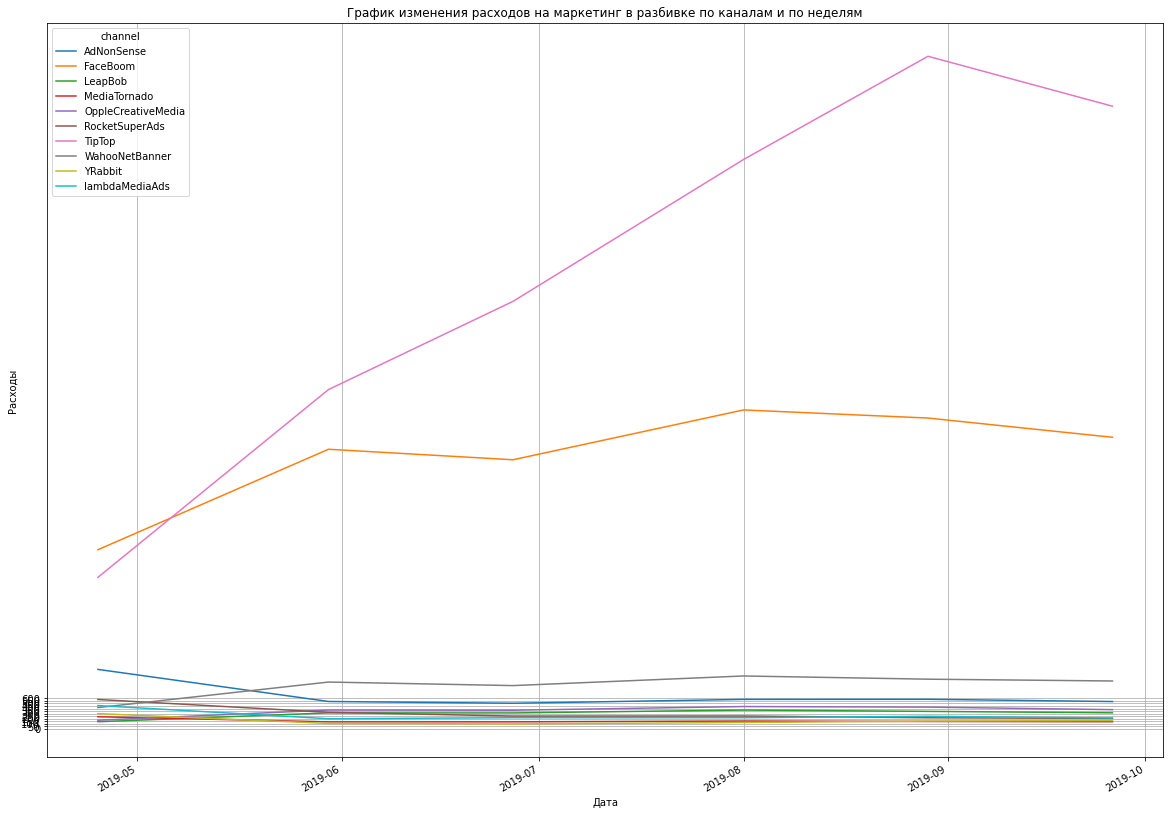

In [46]:
# График изменения расходов во времени по каналам по неделям
costs_history2 = costs.pivot_table(
        index='week', columns='channel', values='costs', aggfunc='sum'
    )
ax = costs_history2.plot(  
           grid=True, figsize=(20,15),      
           label='Каналы',                     
           legend=True,
           
) 

plt.yticks(np.arange(0, 650, 50)) 
plt.title('График изменения расходов на маркетинг в разбивке по каналам и по неделям')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

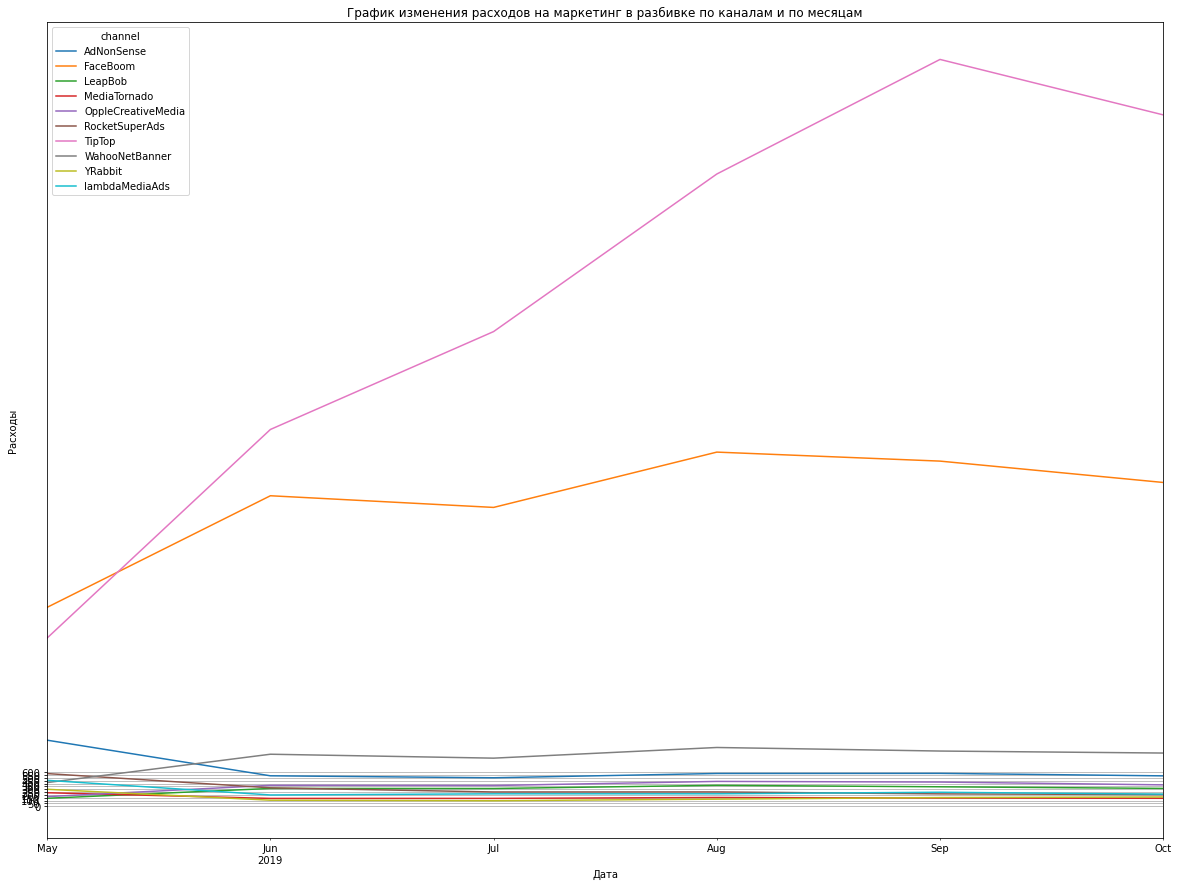

In [47]:
costs_history = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
ax = costs_history.plot(  
           grid=True, figsize=(20, 15),      
           label='Каналы',                     
           legend=True,
           
) 

plt.yticks(np.arange(0, 650, 50)) 
plt.title('График изменения расходов на маркетинг в разбивке по каналам и по месяцам')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()


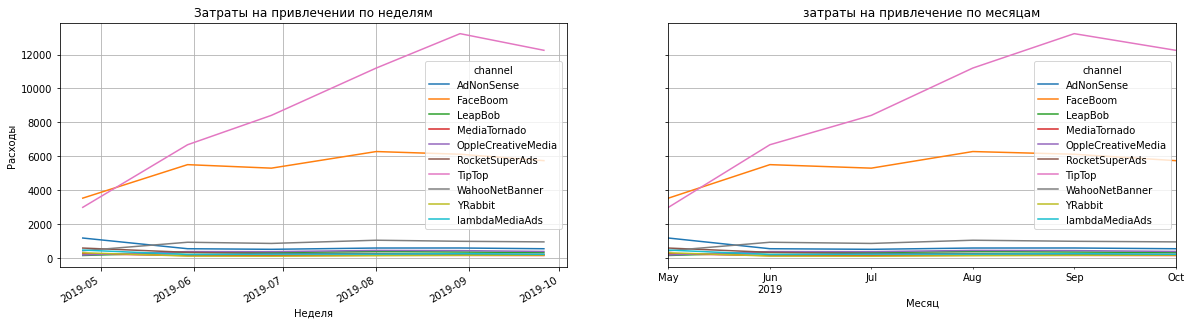

In [49]:
# задаём размер 
plt.figure(figsize=(20, 5))

#первый график — динамика расходов по неделям
ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(grid=True, ax=ax1)
plt.xlabel('Неделя')
plt.ylabel('Расходы ')
plt.title('Затраты на привлечении по неделям')

#второй график — динамика расходов по месяцам
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs.pivot_table(
    index='dt',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(grid=True, ax=ax2)
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.title('затраты на привлечение по месяцам')
plt.show()

Изменение расходов по неделям отражают аналогичную картину,что и по месяцам. Рост до сентября у TipTop и спад в октябре. У FceBoom нет такой волатильности,примерно один уровень затрат. Необходимо посмотреть изменение расходов без лидеров, чтобы оценить другие каналы.


In [ ]:


costs_history3 = costs[~costs['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )

costs_history3.plot(                                             
           figsize=(15, 10), 
           grid=True,      
           label='Каналы',              
           legend=True,
) 


plt.title('График изменения расходов на маркетинг (без лидеров TipTop и FaceBoom) по месяцам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Затраты на AdNonSense имеют пик в мае и дальше с июня снижаются. 
Затраты на WahooNetBanner наоборот с июня растут и в августе достигают пика (более 1000уе).
По остальным источникам затраты менее волотильны и находся в пределах 100-400уе.



<b>Узнаем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.<b>

In [ ]:
profiles.describe()

In [ ]:
profiles['acquisition_cost'].hist(bins=20)
plt.title('CAC')
plt.show()

Наблюдаем выбросы в данных. Слишком большое количество "нулей". Нужно детально проверить данные с "нулями".

In [ ]:
null_cac=profiles.query('acquisition_cost==0')
print(null_cac.head(10))

Это канал Organic. Все логично - расходов на Organic не бывают.

Оценим  CAC на каждый канал 

In [ ]:
channel_cac = pd.DataFrame()
channel_cac['acquisition_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
channel_cac.sort_values(by='acquisition_mean', ascending=False).style.format({'acquisition_mean': '{:.2f}'})

Лидирующее место в данном рейтинге занимает TipTop - 2,8 за каждого пользователя. Далее следует FaceBoom- 1,11.Почти такое же значение у канала AdNonSense	
Остальные каналы имеют значение от в диапозоне 0,70-0,21. Organic - 0.

In [ ]:
display((profiles['acquisition_cost'].mean()))

In [ ]:
round(profiles['acquisition_cost'].mean(),2)

<div class="alert alert-info">

<b>Общий вывод по разделу<b/>:
    
    
1. Посчитана общая сумма расходов на маркетинг:105 497.
2. Определены затраты по каналам в долях. Самый затратный канал TipTop -52%, далее следует FaceBoom 31%. Самый низко затратный канал YRabbit - менее 1%.
3.Построен график динамики расходов во времени по каналам.Самые активные каналы это TipTop и FaceBoom.При этом можно сказать, что расходы растут каждый месяц.Остальные каналы не выделяются столь высокими расходами и волатильностью.
4.Был построен график без лидеров по расходам.Затраты на AdNonSense имеют пик в мае и дальше с июня снижаются. Затраты на WahooNetBanner наоборот с июня растут и в августе достигают пика (более 1000уе). По остальным источникам затраты менее волотильны и находся в пределах 100-400уе.
5. Определены средние показатели CAC по каналам и в общем по проекту.Лидирующее место в данном рейтинге занимает TipTop - 2,8 за каждого пользователя. Далее следует FaceBoom- 1,11.Почти такое же значение у канала AdNonSense.Остальные каналы имеют значение от в диапозоне 0,70-0,21. Organic - 0. В среднем по проекту CAC - 0,7.


    

### Оценим окупаемость рекламы



<b>Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Необходимость включения в анализ органических пользователей определим самостоятельно.<b>

<b>Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.<b>

In [ ]:
# LTV и ROI

profiles = profiles.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

1. LTV в динамике не волотилен. Более того показатель растет.
2.ROI находится ниже 100%, что говорит об отсутствии окупаемости.
3. Динамика CAC говорит об увеличении расходов.
4. ROI пользователей с мае 2019 года был выше 100%, далее с июня Динамика ROI пользователей падает и достигает минимумам в сентябре-октябре.

<b>Проверим конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Построим и изучите графики конверсии и удержания.<b>

In [ ]:
# конверсия пользователей по девайсам

dimensions = ['device']
profiles = profiles.query('channel != "organic"')
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи устройств Mac Android Iphone  имеют высокую и стаблиную конвертацию. PC имеют более низкое значение конвертации 0,04

In [ ]:
# Удержание пользователей по девайсам

dimensions = ['device']
profiles = profiles.query('channel != "organic"')
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Судя по графикам, можно сделать вывод, что неплатящие пользователи плохо удерживаются. Из платящих пользователей хуже всего удерживаютя Ihpone и Mac.   

<b>Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.<b>

In [ ]:
# окупаемость с разбивкой по устройствам

dimensions = ['device']
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

1. Стоимость привлечения растет у всех пользователей. При этом самая низкая у PC, самые высокие у Mac и Iphone.
2. ROI при этом выше всего у PC, ниже всего у Mac и Iphone.
3. график ROI пользователей демонстрирует снижение окупаемости у всех пользователей с июня месяца. При этом Mac и Iphone показывают самые низкие иоказатели.
4. ltv стабилен.


<b>Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.<b>

In [ ]:
#  окупаемость с разбивкой по странам

dimensions = ['region']
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

1. Наблюдаем высокий рост стоимости привлечения пользоваителей у США. 
2. При этом ROI у США  имеет самое низкое значение. 
3. ltv стабилен.
4. Англия и Германия имеют высокие показатели окупаемости.

In [ ]:
# конверсия с разбивкой по странам
dimensions=['region']
profiles = profiles.query('channel != "organic"')
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самая большая конверсия среди стран у США, У Франции Англии и Германии примерно на одном уровне. Конверсия в целом стабильна

In [ ]:
# удержание с разбивкой по странам
dimensions=['region']
profiles = profiles.query('channel != "organic"')
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи из США удерживаются хуже всех.

<b>Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.<b>


In [ ]:
# окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

1. Наблюдаем высокий темп роста показателя CAC у канала TipTop, при этом остальные каналы менее волатильны.
2. Высокий показатели ROI на 14 день у YRabbit 
3. LTV  стабилен. 

In [ ]:
# конверсия с разбивкой по каналам
dimensions=['channel']
profiles = profiles.query('channel != "organic"')
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лучше всего конвертируются каналы FaceBoom  AdNonSense. Хуже всего RocketSuperAds, MediaTornado, YRabbit.

In [ ]:
# удержание с разбивкой по каналам
dimensions=['channel']
profiles = profiles.query('channel != "organic"')
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

<b>Ответим на такие вопросы:
Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости?
Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.<b>

В целом реклама окупается, с учетом канала Organic. Данный канал не был исключен из анализа. 
Негативное влияние на окупаемость оказывают  устройства Mac и iPhone,канал - FaceBoom, TipTop,LeapBop, страна - США.
Проблема окупаемости может быть вызвана высокими расходами на рекламу или неверное распределение между каналами.
В качестве рекомендаций: Использовать данные прошлых лет для построения прогноза окупаемости. Такой бизнес план может быть более эффективен в действии.

###  выводы

- Выделим причины неэффективности привлечения пользователей.
- Сформулируем рекомендации для отдела маркетинга.

Причины неэффективности привлечения пользователей:
ROI находится ниже 100%, что говорит об отсутствии окупаемости.
Основная причина это увеличение расходов исходя из графика. При этом  ROI пользователей падает и достигает минимумам в сентябре-октябре.
Стоимость привлечения пользователей всех устройств росла за рассматриваемый период. Iphone и Mac выделяются среди остальных устройств по своей стоимости привлечения, однако ROI падает.
Конвертация у устройств Iphone и Mac, Android постоянная и в норме. Так же как и удержание. Если рассматривать среди платящих и неплатящих пользователей, то хуже удерживаются неплатящие.
Если рассматривать территориально вопрос окупаемости, то здесь аутсайдер - США , при том что самое большое количество пользователей именно из штатов(67%).
Меньше всего пользователей из Германии и почти равное по долях из Англии и Франции. При этом лучше всего окупаемость у Англии и Германии.
По каналам вывод следующий: TipTop самый затратный канал , однако Roi на низком уровне.Высокий показатели ROI на 14 день у YRabbit. При этом у данного канала низкие расходы



Рекомендации для маркетинга:
    Расширять территорию среди стран с высокой окупаемостью - Англия и Германия. 
    Ввиду того, что основной пул пользователей все таки в США необходимо выявить причины снижения окупаемости с июля месяца.
    Пересмотр распределения расходов на рекламу на другие каналы. Сейчас основной канал по расходам у TipTop. При этом окупаемость не оправдывает данные расходы.
    